# TASK 1    TITANIC SURVIVAL PREDICTION

## Import Libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset

In [6]:
# Load the dataset
titanic_data = pd.read_csv('C://Users//RUSHIKESH//Downloads//Titanic-Dataset.csv')

# Display the first few rows of the dataset
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

In [11]:
# Dropping irrelevant columns
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handling missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Encoding categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)


## Visualize the Data

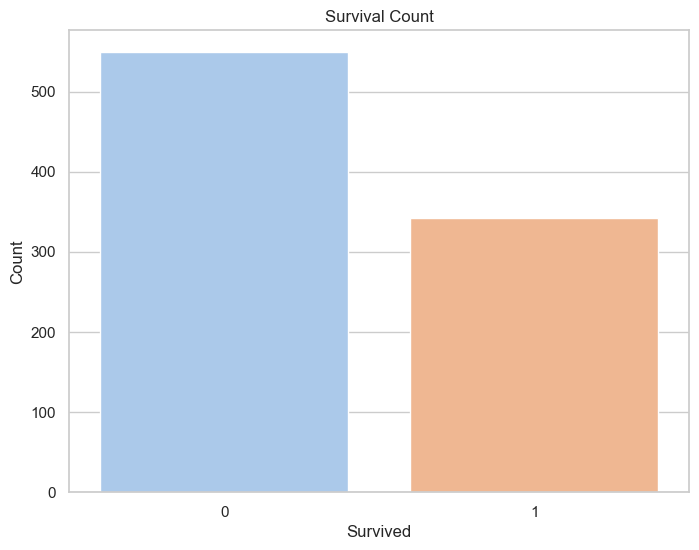

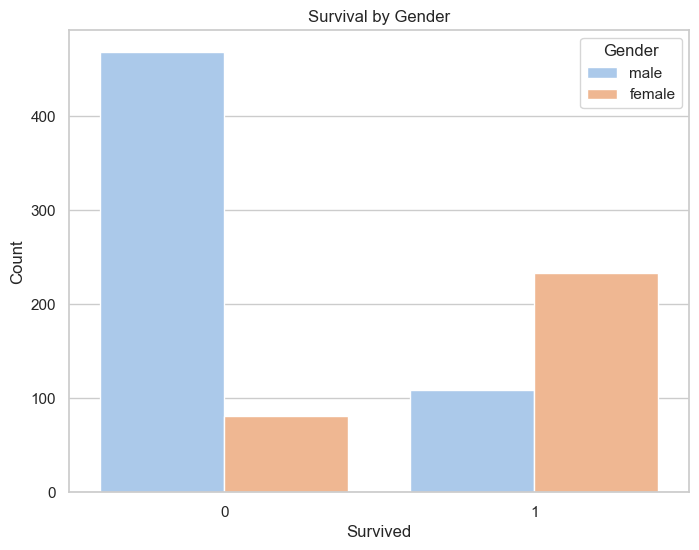

In [11]:
# Set the style of the visualizations
sns.set(style="whitegrid")

# 1. Survival Count
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic_data, palette='pastel')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# 2. Survival by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=titanic_data, palette='pastel')
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


## Split Data into Training and Testing Sets

In [12]:
# Splitting the data into features and target variable
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Scaling

In [13]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Train the Logistic Regression Model

In [14]:
# Model training
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## Make Predictions

In [15]:
# Making predictions
y_pred = model.predict(X_test)


## Evaluate the Model

In [16]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8100558659217877
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Plot the Confusion Matrix

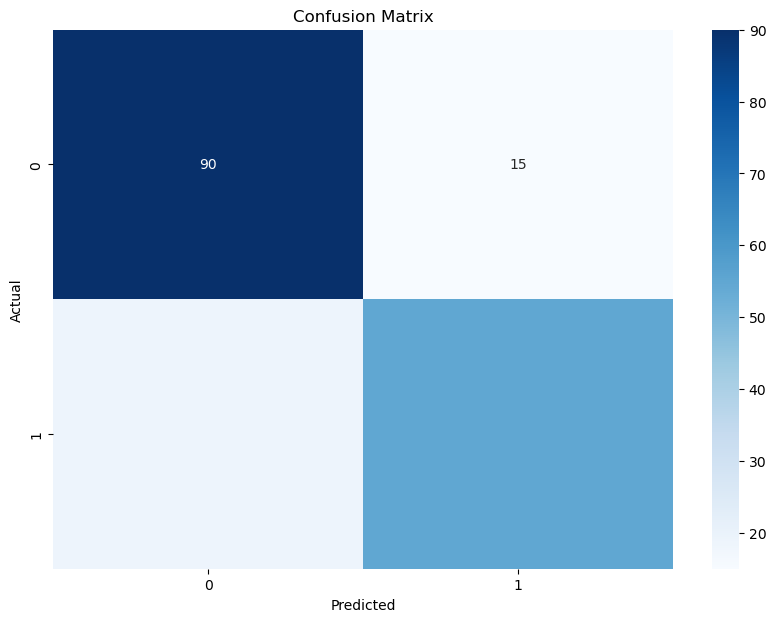

In [17]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
